In [181]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [182]:
perf_by_day = pd.read_csv('performance_per_day_route.csv')
perf_by_day.columns 

Index(['date', 'route_id', 'direction', 'schd_depart_hour', 'wait_time', 'otp',
       'schd_hw_avg', 'hw_avg', 'pct_delivered', 'tot_trips', 'ons', 'year',
       'trips_observed'],
      dtype='object')

In [183]:
perf_by_day.sort_values(by="wait_time", ascending=False)
perf_by_day_filtered = perf_by_day[(perf_by_day["schd_hw_avg"] < 40) & (perf_by_day["wait_time"] < 60)]

In [184]:

scheduled_headway_by_route = perf_by_day_filtered.groupby('route_id')["schd_hw_avg"].mean()

high_freq_mean_hw = scheduled_headway_by_route[scheduled_headway_by_route < 15].mean()
low_freq_mean_hw = scheduled_headway_by_route[scheduled_headway_by_route >= 15].mean()

high_freq_routes = scheduled_headway_by_route[scheduled_headway_by_route < 15].index.tolist()
low_freq_routes = scheduled_headway_by_route[scheduled_headway_by_route >= 15].index.tolist()



In [185]:
num_routes = perf_by_day["route_id"].nunique()
low_freq_pct = (len(low_freq_routes)/num_routes)*100
print('low_freq_pct', low_freq_pct)

high_freq_pct = (len(high_freq_routes)/num_routes)*100
print('high_freq_pct', high_freq_pct)

low_freq_pct 62.295081967213115
high_freq_pct 37.704918032786885


### High Frequency Routes Model

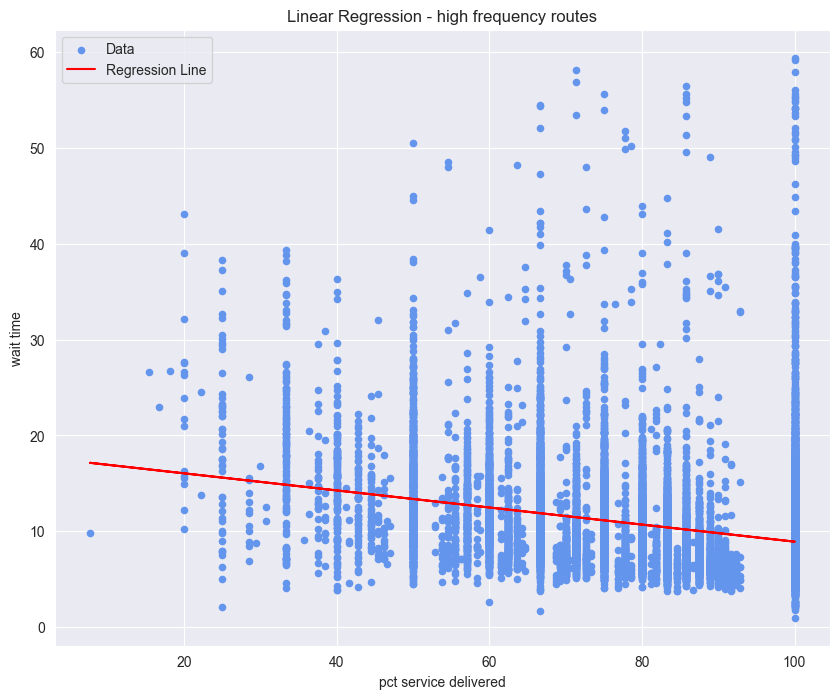

Coefficients: [[-0.08917231]]
Intercept: [17.81524749]
R squared: 0.09917577748423545


In [186]:

model = LinearRegression()

high_frequency_data = perf_by_day_filtered[perf_by_day_filtered["route_id"].isin(high_freq_routes)].dropna(axis=0, how='any')

X = high_frequency_data['pct_delivered'].values.reshape(-1, 1)
y = high_frequency_data['wait_time'].values.reshape(-1, 1)

model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='cornflowerblue', marker='o', label='Data', s=20)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('pct service delivered')
plt.ylabel('wait time')
plt.title('Linear Regression - high frequency routes')
plt.legend()
plt.show()

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print('R squared:', model.score(X, y))


In [187]:
high_frequency_data

,date,route_id,direction,schd_depart_hour,wait_time,otp,schd_hw_avg,hw_avg,pct_delivered,tot_trips,ons,year,trips_observed
290,2022-10-10,119,North,4,11.624071,71.428571,23.807540,23.034921,100.000000,3.0,14.0,2022,3.0
291,2022-10-10,119,North,5,8.927264,50.510204,18.000000,17.413265,100.000000,4.0,14.0,2022,4.0
292,2022-10-10,119,North,6,6.500337,52.653061,10.419048,12.348503,83.333333,6.0,32.0,2022,5.0
293,2022-10-10,119,North,7,5.176235,55.102041,9.750000,9.759240,100.000000,6.0,45.0,2022,6.0
294,2022-10-10,119,North,8,5.942215,45.128205,11.251282,11.160855,80.000000,5.0,40.0,2022,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70617,2023-10-27,X9,South,10,11.142302,52.427184,16.425081,18.461650,100.000000,3.0,141.0,2023,3.0
70619,2023-10-27,X9,South,16,6.916265,64.976959,11.086482,11.470123,100.000000,6.0,400.0,2023,6.0
70620,2023-10-27,X9,South,17,8.924986,51.020408,9.527324,13.610658,80.000000,5.0,289.0,2023,4.0
70621,2023-10-27,X9,South,18,8.504143,13.186813,10.054029,14.513004,60.000000,5.0,101.0,2023,3.0


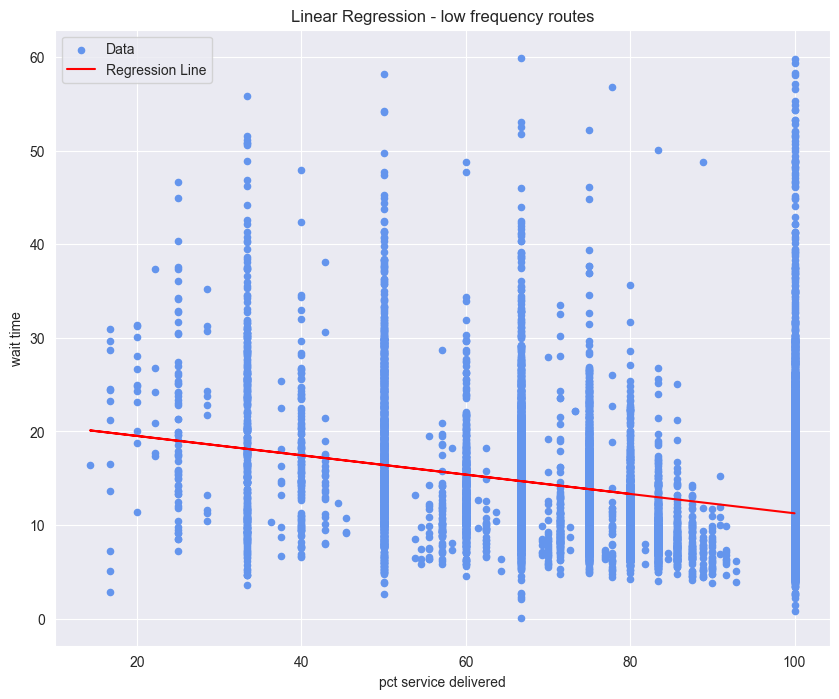

Coefficients: [[-0.10331298]]
Intercept: [21.59194438]
R squared: 0.10793252470635284


In [188]:

model = LinearRegression()

low_frequency_routes = perf_by_day_filtered[perf_by_day_filtered["route_id"].isin(low_freq_routes)].dropna(axis=0, how='any')

X = low_frequency_routes['pct_delivered'].values.reshape(-1, 1)
y = low_frequency_routes['wait_time'].values.reshape(-1, 1)

model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='cornflowerblue', marker='o', label='Data', s=20)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('pct service delivered')
plt.ylabel('wait time')
plt.title('Linear Regression - low frequency routes')
plt.legend()
plt.show()

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print('R squared:', model.score(X, y))